In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import datasets, linear_model, metrics, tree
from statsmodels.stats.proportion import proportions_ztest
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score,f1_score, accuracy_score, confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.feature_selection import chi2, SelectKBest, f_regression
from imblearn.over_sampling import RandomOverSampler, SMOTE

from scipy.cluster import hierarchy
import xgboost as xgb

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.shape

(6819, 96)

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
df.info()
#No null or missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
print(np.where(df.isnull() == True))
df.isnull().sum()

(array([], dtype=int64), array([], dtype=int64))


Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [8]:
df_columns = df.columns
print(df_columns)

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

# Fitting a baseline model

In [11]:
X = df.drop('Bankrupt?', axis = 1).values
y = df['Bankrupt?'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 23, stratify = y)

In [23]:
log_reg = linear_model.LogisticRegression(max_iter = 500)

In [24]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [25]:
y_pred = log_reg.predict(X_test)

In [ ]:
#mse_log_reg = MSE(y_test, y_pred)
#rmse_log_reg = mse_log_reg * (1/2)
#print(f'mse_log_reg: {mse_log_reg} and rmse_log_reg: {rmse_log_reg}')

In [26]:
log_reg_f1_score = f1_score(y_test,y_pred)
print(f'log_reg_f1_score: {log_reg_f1_score}')

log_reg_f1_score: 0.0


In [38]:
accuracy_score_log_reg = accuracy_score(y_test, y_pred)
print(accuracy_score_log_reg)

0.9626099706744868


In [40]:
cm_log_reg = confusion_matrix(y_test, y_pred)
print(cm_log_reg)

[[1313    7]
 [  44    0]]


# Over Sampling Baseline

In [46]:
over_sampling = RandomOverSampler(random_state = 23)

In [48]:
X_os, y_os = over_sampling.fit_resample(X,y)

In [51]:
X_os_train, X_os_test, y_os_train, y_os_test = train_test_split(X_os,y_os, test_size = 0.2, random_state = 23)

In [58]:
log_reg_os = linear_model.LogisticRegression(max_iter = 500)

In [59]:
log_reg_os.fit(X_os_train,y_os_train)

LogisticRegression(max_iter=500)

In [61]:
y_os_pred = log_reg_os.predict(X_os_test)

In [62]:
cm_log_reg_os = confusion_matrix(y_os_test, y_os_pred)
print(cm_log_reg_os)

[[1017  309]
 [ 699  615]]


In [63]:
accuracy_score_log_reg_os = accuracy_score(y_os_test, y_os_pred)
print(accuracy_score_log_reg_os)

0.6181818181818182


In [64]:
f1_score_log_reg_os  = f1_score(y_os_test, y_os_pred)
print(f1_score_log_reg_os)

0.5495978552278821


[[1017  699]
 [ 309  615]]


# SMOTE BASELINE

In [68]:
smote_log_reg = SMOTE(random_state = 23)

In [69]:
X_train_slr, y_train_slr = smote_log_reg.fit_resample(X_train, y_train)

In [70]:
log_reg_smote = linear_model.LogisticRegression(max_iter = 500)

In [71]:
log_reg_smote.fit(X_train_slr, y_train_slr)

LogisticRegression(max_iter=500)

In [72]:
y_pred_slr = log_reg_smote.predict(X_test)

In [73]:
cm_log_reg_smote = confusion_matrix(y_test, y_pred_slr)
print(cm_log_reg_smote)

[[951 369]
 [ 20  24]]


In [74]:
accuracy_score_log_reg_smote = accuracy_score(y_test, y_pred_slr)
print(accuracy_score_log_reg_smote)

0.7148093841642229


In [75]:
f1_score_log_reg_smote  = f1_score(y_test, y_pred_slr)
print(f1_score_log_reg_smote)

0.10983981693363845


In [ ]:
plt.figure(figsize = (17,10))
sns.scatterplot(x=np.arange(len(y_test)), y = y_test, color = 'blue', label = 'test', alpha = 0.5)
sns.scatterplot(x=np.arange(len(y_pred)), y = y_pred, color = 'red', label = 'predictions', alpha = 0.5)
plt.show()

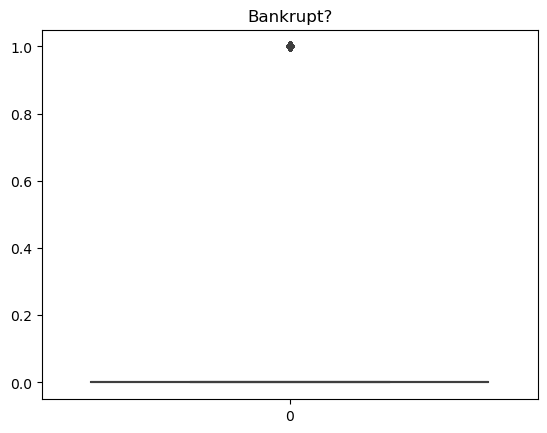

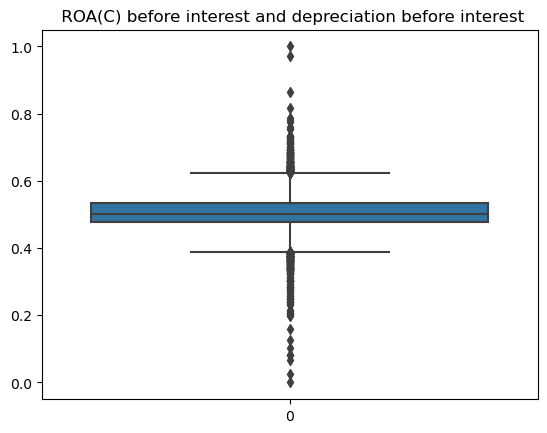

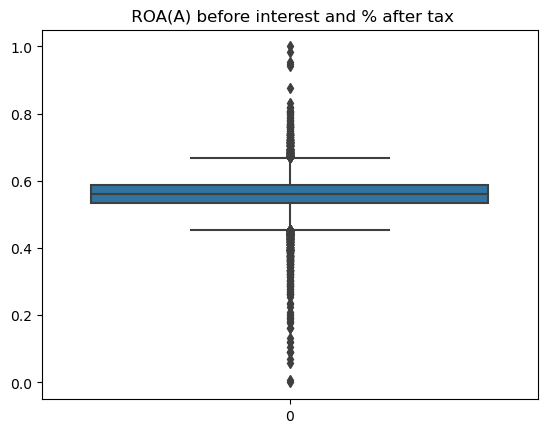

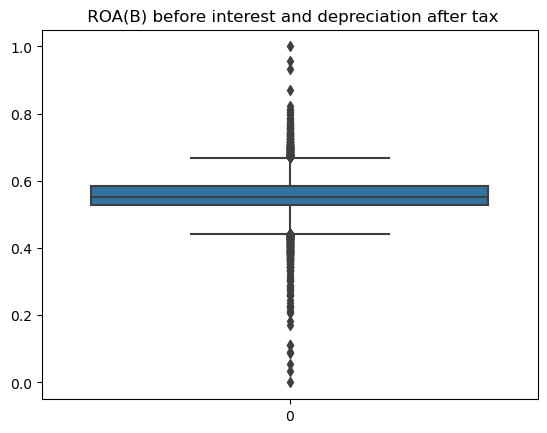

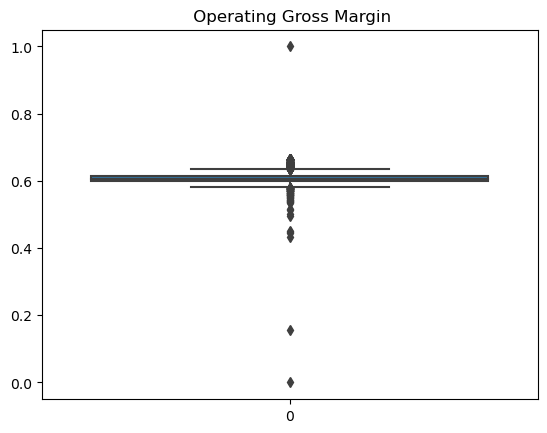

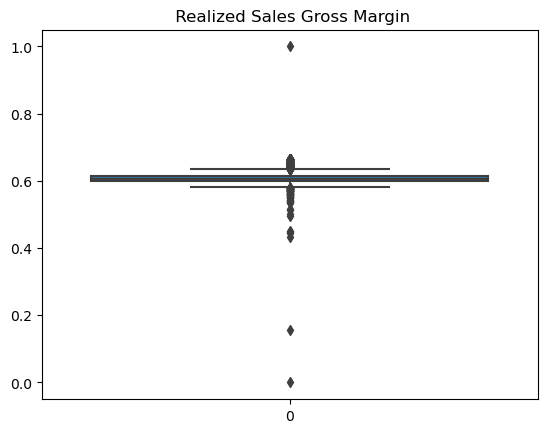

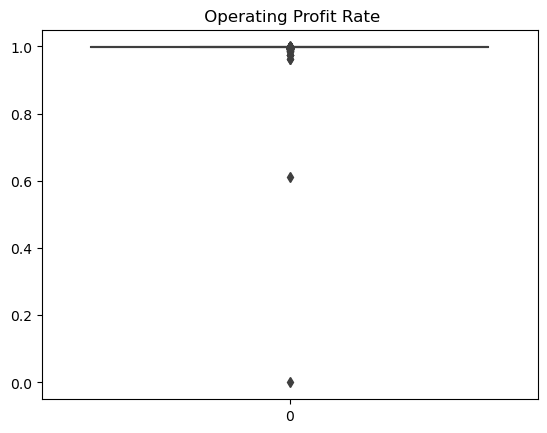

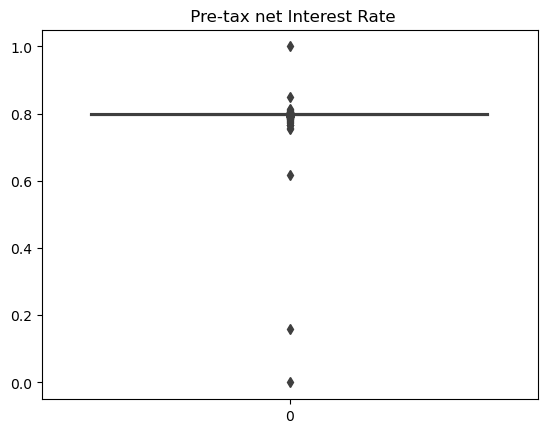

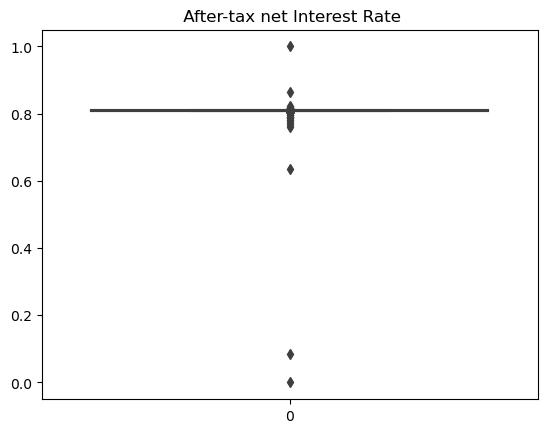

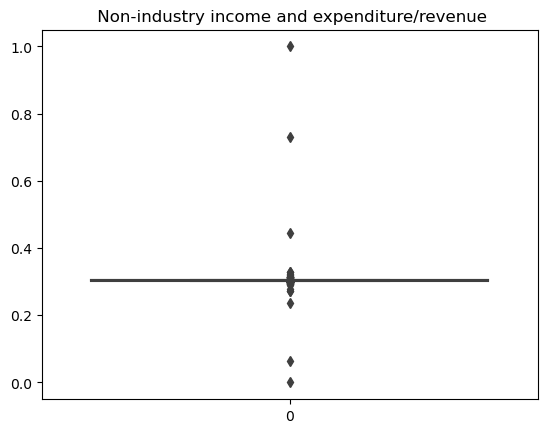

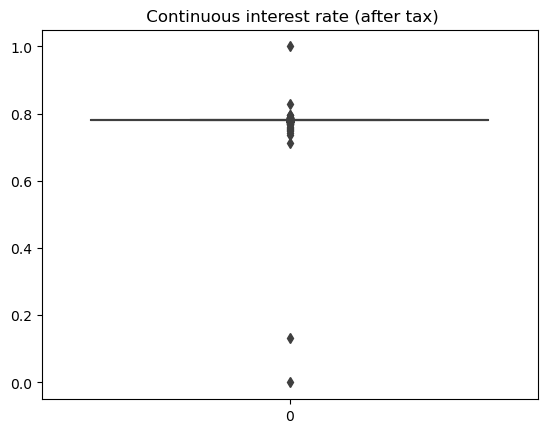

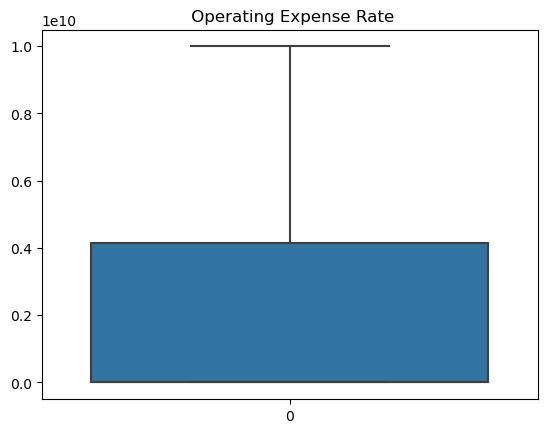

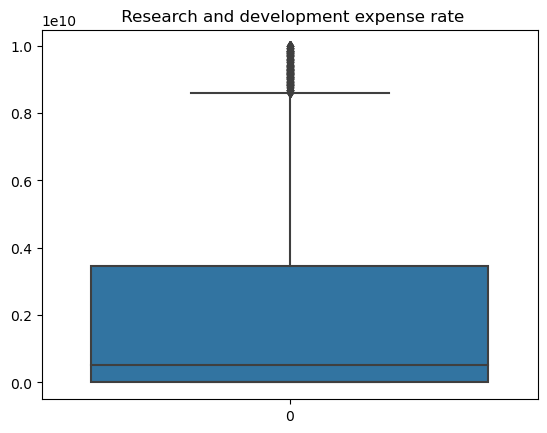

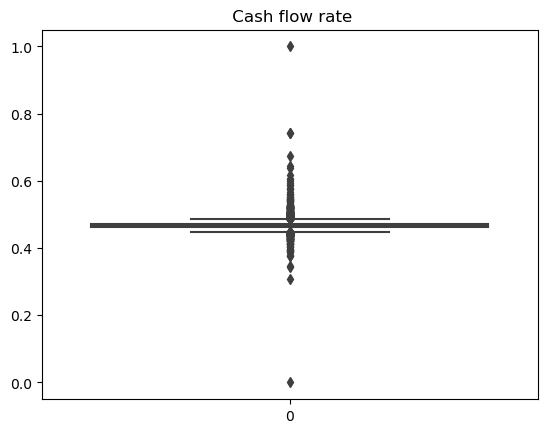

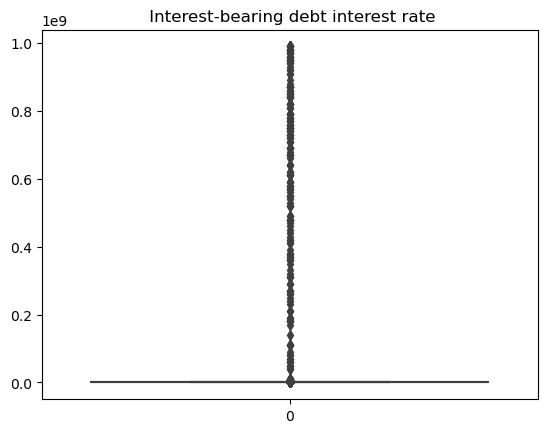

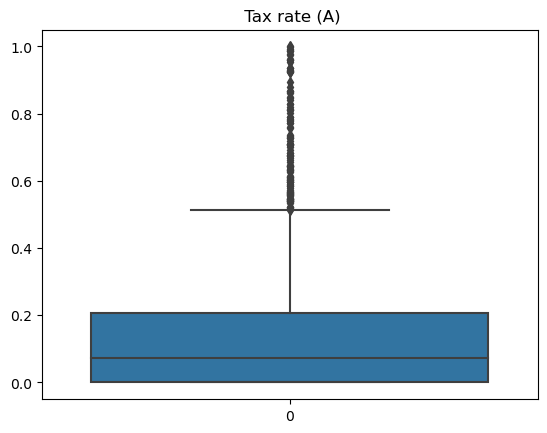

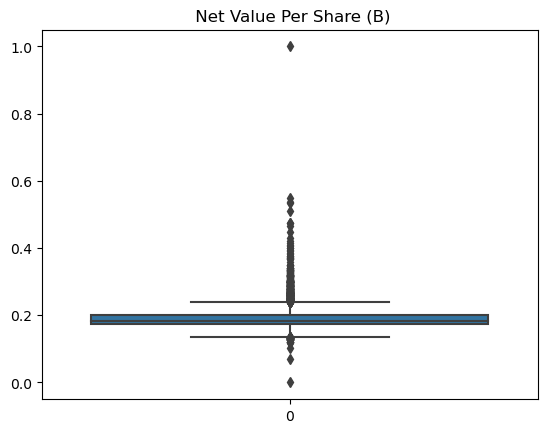

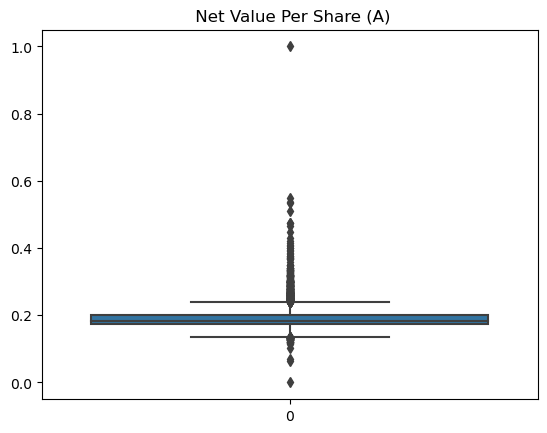

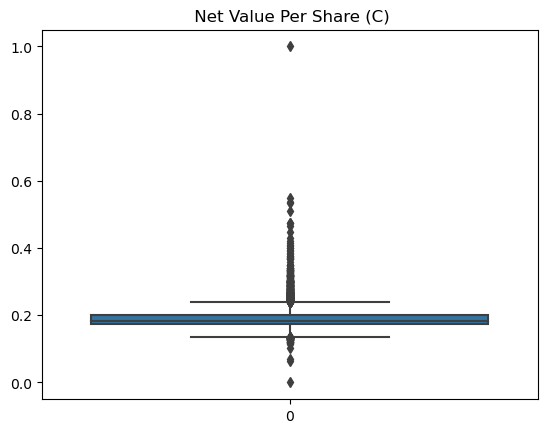

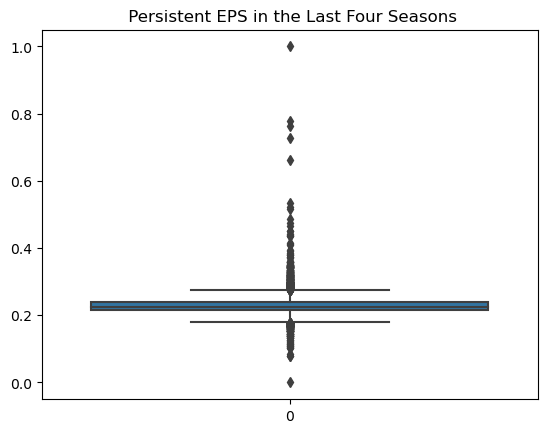

In [ ]:
for col in df_columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [ ]:
df_is_bankrupt = pd.DataFrame(df[df['Bankrupt?'] == 1])
df_is_not_bankrupt = pd.DataFrame(df[df['Bankrupt?'] == 0])

In [ ]:
for col in df_columns:
    sns.boxplot(df_is_bankrupt[col])
    plt.title(col)
    plt.show()

In [ ]:
#Comparing columns side by side
for col in df_columns:
    plt.figure(figsize = (17,12))
    sns.boxplot(data = [df_is_not_bankrupt[col], df_is_bankrupt[col]])
    plt.title(col)
    plt.show()
    

In [ ]:
for col in df_columns:
    print(df.groupby('Bankrupt?')[col].mean(), '\n'*2)

# Correlation

In [ ]:
corr_matrix_df = df.corr()
mask = np.tril(np.ones_like(corr_matrix_df, dtype = bool),k=0)
plt.figure(figsize = (17,17))
corr_heatmap = sns.heatmap(corr_matrix_df, vmin = -1, mask = mask, vmax = 1, cmap = "BrBG")
plt.title('Corr Heatmap', pad = 14)
plt.show()

In [ ]:
corr_matrix_df.columns

In [ ]:
corr = pd.DataFrame(corr_matrix_df.values>=0.7, columns = corr_matrix_df.columns, index = corr_matrix_df.columns)
corr

In [ ]:
#Hierarchial clustering to reorder columns
linkage = hierarchy.linkage(corr_matrix_df, method = 'ward')
order = hierarchy.leaves_list(linkage)

# Feature selection

In [ ]:
#df = df.drop(' Net Income Flag', axis = 1)
df_v1 = df.copy()

In [ ]:
corr_mid_v1[corr_mid_v1.any(axis = 1)]

In [ ]:
corr_mid_v1 = corr_matrix_df>=0.7
corr_matrix_df[corr_mid_v1 == True]

In [ ]:
#df_v1 = df_v1.drop(' ROA(A) before interest and % after tax', axis = 1)


In [ ]:
df_v1 = df_v1.drop(' ROA(B) before interest and depreciation after tax', axis = 1)

In [ ]:
df_v1 = df_v1.drop(' Realized Sales Gross Margin', axis = 1)

In [ ]:
df_v1 = df_v1.drop(' Pre-tax net Interest Rate', axis = 1)
df_v1 = df_v1.drop(' After-tax net Interest Rate', axis = 1)

In [ ]:
df_v1 = df_v1.drop(' Continuous interest rate (after tax)', axis = 1)
df_v1 = df_v1.drop(' Net Income to Total Assets', axis = 1)

In [ ]:
df_v1 = df_v1.drop(" Net Income to Stockholder's Equity", axis = 1)

In [ ]:
df_v1 = df_v1.drop(" Gross Profit to Sales", axis = 1)

In [ ]:
corr_matrix_df_v1 = df_v1.corr()
corr_mid_df_v1 = corr_matrix_df_v1.abs()>=0.7
corr_matrix_df_v1[corr_mid_df_v1==True][12:]

In [ ]:
np.where(corr_matrix_df_v1.abs()>=0.7)

In [ ]:
corr_mid_df_v1[2:]

In [ ]:
np.where(corr_matrix_df>=0.7)

# Train-Test Split

In [ ]:
X = df.drop('Bankrupt?', axis = 1).values
y = df['Bankrupt?'].values